## This notebook is to generate fasta files to search for consensus sequences in the indentified carboxylic acid responsive TCSs.

- Goal 1: Make a list of probable cognate HKs and RRs
- Goal 2: Pull out HKs which are cognate to the carboxylic acids responsive RRs
- Goal 3: Generate fasata files of cognate HK and RR pairs
- Goal 4: run files through consensus sequence tool and save figures

In [141]:
import pandas as pd
import numpy as np
import Bio.SeqIO as SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [97]:
ls SampledTCS/

TCSPlaygound_AcetobacterDB_1.csv
TCSPlaygound_Acetobacter_PPDB_1.csv
TCSPlaygound_ActinobacteriaDB_2.csv
TCSPlaygound_ActinobacteriaDB.csv
TCSPlaygound_AlphaproteobacteriaDB_2.csv
TCSPlaygound_AlphaproteobacteriaDB_4.csv
TCSPlaygound_AlphaproteobacteriaDB.csv
TCSPlaygound_BacteriaDB_2.csv
TCSPlaygound_BacteriaDB_3.csv
TCSPlaygound_BacteriaDB.csv
TCSPlaygound_BacteroidetesDB_2.csv
TCSPlaygound_BacteroidetesDB.csv
TCSPlaygound_BartonellaDB_1.csv
TCSPlaygound_Bartonella_PPDB_1.csv
TCSPlaygound_BetaproteobacteriaDB_2.csv
TCSPlaygound_BetaproteobacteriaDB.csv
TCSPlaygound_BrevundimonasDB_1.csv
TCSPlaygound_Brevundimonas_PPDB_1.csv
TCSPlaygound_ChloroflexiDB_2.csv
TCSPlaygound_ChloroflexiDB.csv
TCSPlaygound_DeltaproteobacteriaDB_2.csv
TCSPlaygound_DeltaproteobacteriaDB.csv
TCSPlaygound_FirmicutesDB_2.csv
TCSPlaygound_FirmicutesDB.csv
TCSPlaygound_GammaproteobacteriaDB_2.csv
TCSPlaygound_GammaproteobacteriaDB.csv
TCSPlaygound_ParacoccusDB_1.csv
TCSPlaygound_Paracoccus_PPDB_1.csv
TCSPlaygound_

In [401]:
df = pd.read_csv("SampledTCS/TCSPlaygound_AlphaproteobacteriaDB_2.csv")
df[df["TCStype"].isin(["HK", "RR"])].sort_values("stable_id")

,TCStype,aseq_id,domain_counts,domain_seq,env_from,env_to,gene_id,sequence,stable_id,version
668,RR,hmerUPwNDz9iBtYTSX9cgA,"{'RR': 1, 'Trans_reg_C': 1}",LVDTDLTRAVRGALGDGGFAVDVVGTLEQASSAFFSASYEILLLEL...,4,111,1193991,MRTLLVDTDLTRAVRGALGDGGFAVDVVGTLEQASSAFFSASYEIL...,GCF_000018545.1-NGR_a00800,GCF_000018545.1
667,RR,mJysxsgbbbnItKEB_OxWVQ,{'RR': 1},LIVDDENTKVVEICGVLRDAQITEESITVATTAASALKELKESYFD...,3,108,1194207,MRILIVDDENTKVVEICGVLRDAQITEESITVATTAASALKELKES...,GCF_000018545.1-NGR_a02960,GCF_000018545.1
666,RR,8fMpUrqQA-FKWCiuYYm7aA,"{'RR': 1, 'Trans_reg_C': 1}",LIVDDDREIRELVSSYLKKNGLRATAVADGRQMRAFLDGNTVDLII...,7,118,1194579,MEHIDHILIVDDDREIRELVSSYLKKNGLRATAVADGRQMRAFLDG...,GCF_000018545.1-NGR_b02480,GCF_000018545.1
664,RR,ltN3Pm3m1hDY8W2mCFis4w,"{'RR': 1, 'GerE': 1}",LIVDDHPLFCDALAMTLSGLVGIQSIESVGTLDAALARLDQDGPPD...,29,142,1194653,MIIIRNSFQTPRTISPVQPLFKPVELRSALIVDDHPLFCDALAMTL...,GCF_000018545.1-NGR_b03240,GCF_000018545.1
663,RR,mc3lH0pn3PIvWhXYYjauGA,"{'RR': 1, 'GerE': 1}",AVIDDHPLFREGVTRSLSEIDGFEIVAEGGSRDDALRIAENLAPDV...,7,118,1194669,MTAAIRVAVIDDHPLFREGVTRSLSEIDGFEIVAEGGSRDDALRIA...,GCF_000018545.1-NGR_b03400,GCF_000018545.1
...,...,...,...,...,...,...,...,...,...,...
896,HK,zXpghD4KBk_7agjVuJEyGg,{'HK_CA': 1},RTAMLAGVSHDLRTPLTRLKLALAMQPDSPDMEALRADVAEMERMV...,232,436,20201097,MLKRYLPKSLYARVALIVILPIFLMQSFVTYVFFERHWDLVSANLS...,GCF_900199215.1-CHB64_RS12365,GCF_900199215.1
895,RR,alcC5VGMU3QEv85jhBxwDQ,"{'RR': 1, 'Trans_reg_C': 1}",LIVDDDDRIRSLLKRYLAENGYRASAAANAEEARELLASMAFDLLI...,11,120,20201098,MRQAGEESAHILIVDDDDRIRSLLKRYLAENGYRASAAANAEEARE...,GCF_900199215.1-CHB64_RS12370,GCF_900199215.1
892,HK,pvhrxQbUhg0AJIATU2I94w,{'HK_CA': 1},RSEFLANMNHELRTPLNAVIGFATMLRDSDVYDLSDEQRRAYAEYI...,48,276,20201421,MRAYNPFVVHDGSLIASYAARMAEAVAVRRATDEARAAREQAELSI...,GCF_900199215.1-CHB64_RS13145,GCF_900199215.1
891,RR,8B_hjbB5h1JddrvSma1_TA,{'RR': 1},LVVDDLEVNVLLLKAKLSAANYSVLCAESGARAIETARTEHPDIIL...,4,116,20201514,MTRVLVVDDLEVNVLLLKAKLSAANYSVLCAESGARAIETARTEHP...,GCF_900199215.1-CHB64_RS13475,GCF_900199215.1


In [406]:
df["gene_number"] = df["stable_id"].str.rsplit("_", expand = True)[2].str.replace("RS", "").str.replace("A", "").str.replace(r'[a-z]', "").astype("float")
df["gene_number"]

/tmp/ipykernel_54185/2897915568.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["gene_number"] = df["stable_id"].str.rsplit("_", expand = True)[2].str.replace("RS", "").str.replace("A", "").str.replace(r'[a-z]', "").astype("float")


0       2170.0
1       2165.0
2       2150.0
3       2040.0
4       1960.0
         ...  
1453    1705.0
1454    1300.0
1455    1295.0
1456    2445.0
1457    2295.0
Name: gene_number, Length: 1458, dtype: float64

In [407]:
pairs_in_data_set = []

for version in df["version"].unique():

    gene_numbers = df[df["version"].str.contains(version)]["gene_number"]
    stable_ids = df[df["version"].str.contains(version)]["stable_id"]


    pairs_in_data_set.extend([[stable_id1, stable_id2] for i, stable_id1 in  zip(gene_numbers, stable_ids) for j, stable_id2 in zip(gene_numbers, stable_ids) if abs(i-j) <=5 and i-j !=0])

pairs_in_data_set



[['GCF_000739895.2-SP6_RS02170', 'GCF_000739895.2-SP6_RS02165'],
 ['GCF_000739895.2-SP6_RS02165', 'GCF_000739895.2-SP6_RS02170'],
 ['GCF_000739895.2-SP6_RS02450', 'GCF_000739895.2-SP6_RS02445'],
 ['GCF_000739895.2-SP6_RS02445', 'GCF_000739895.2-SP6_RS02450'],
 ['GCF_000739895.2-SP6_RS03125', 'GCF_000739895.2-SP6_RS03120'],
 ['GCF_000739895.2-SP6_RS03120', 'GCF_000739895.2-SP6_RS03125'],
 ['GCF_000739895.2-SP6_RS05315', 'GCF_000739895.2-SP6_RS05310'],
 ['GCF_000739895.2-SP6_RS05310', 'GCF_000739895.2-SP6_RS05315'],
 ['GCF_000739895.2-SP6_RS05310', 'GCF_000739895.2-SP6_RS05305'],
 ['GCF_000739895.2-SP6_RS05305', 'GCF_000739895.2-SP6_RS05310'],
 ['GCF_000739895.2-SP6_RS05305', 'GCF_000739895.2-SP6_RS05300'],
 ['GCF_000739895.2-SP6_RS05300', 'GCF_000739895.2-SP6_RS05305'],
 ['GCF_000739895.2-SP6_RS05565', 'GCF_000739895.2-SP6_RS05560'],
 ['GCF_000739895.2-SP6_RS05560', 'GCF_000739895.2-SP6_RS05565'],
 ['GCF_000739895.2-SP6_RS05485', 'GCF_000739895.2-SP6_RS05480'],
 ['GCF_000739895.2-SP6_RS

In [408]:
ls TSNE_output/

 TSNEAlphaproteobacteria_DB1.csv   TSNEDeltaproteobacteria_DB2.csv
 TSNEAlphaproteobacteria_DB2.csv   TSNEGammaproteobacteria_DB1
 TSNEAlphaproteobacteriaDB_4.csv   TSNEGammaproteobacteria_DB1.csv
 TSNEBacteriaDB_1.csv              TSNEGammaproteobacteria_DB2
 TSNEBacteriaDB_2.csv              TSNEGammaproteobacteria_DB2.csv
 TSNEBacteriaDB_3.csv              TSNEProteobacteriaDB_1.csv
 TSNEBetaproteobacteria_DB1       'TSNEProteobacteriaDB_1.csv)'
 TSNEBetaproteobacteria_DB1.csv    TSNEProteobacteriaDB_2.csv
 TSNEBetaproteobacteria_DB2        TSNEProteobacteriaDB_3.csv
 TSNEBetaproteobacteria_DB2.csv    TSNEPseudomonasDB_1.csv
 TSNEDeltaproteobacteria_DB1      'TSNEPseudomonasDB_1.csv)'
 TSNEDeltaproteobacteria_DB1.csv   TSNEPseudomonasDB_2.csv
 TSNEDeltaproteobacteria_DB2       TSNEPseudomonasDB_3.csv


In [409]:
df_TSNE = pd.read_csv("TSNE_output/TSNEAlphaproteobacteria_DB2.csv")
df_TSNE.species.unique()

array(['SP6', 'OCH7691', 'OTBS', 'ERUM', 'BEN30', 'F563', 'G455', 'G523',
       'APZ00', 'PAM7066', 'CHB90', 'NGR', 'N177', 'B488', 'F812',
       'CHB64', 'MAIT1', 'B150', 'B152', 'Cva', 'CEP68', 'ABI'],
      dtype=object)

In [410]:
def palette(source):
    order = ['no domain', 'Trans_reg_C', 'HTH_8', 'GerE', 'Sigma54_activat']
    colors = [ "#000000", "#e3ac2d","#de1c07","#0209d6","#de1c07"]
    
    orderedDomainPalette = dict(zip(order, colors))

    AllDomains =  source["DBD"].unique()
    n=len(AllDomains)*10
    greys= sns.color_palette("Greys",n_colors = n, desat=0)[int(n*.3):int(n*0.7)]
    AllDomainsPalette = dict()
    for i, domain in enumerate(AllDomains):
        if domain in order:
            AllDomainsPalette[domain] = orderedDomainPalette[domain]
        else:
            AllDomainsPalette[domain] = greys[i]
            
    
    
    
    return AllDomainsPalette

In [411]:
def pos_neg():
    return 1 if random.random() < 0.5 else -1
pos_neg()

1

/usr/local/share/jupyteruser/.virtualenvs/biopython_3.8-kHq-BLTU/lib/python3.8/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


,Unnamed: 0,gene_id,version,phylum,class,order,family,genus,species_x,DBD,id,species,tsne-pca500-one,tsne-pca500-two
18,18,SP6_RS04725,GCF_000739895.2,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,Sphingomonas paucimobilis,Sigma54_activat,GCF_000739895.2-SP6_RS04725,SP6,25.511456,7.094674
43,43,SP6_RS19025,GCF_000739895.2,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,Sphingomonas paucimobilis,GerE,GCF_000739895.2-SP6_RS19025,SP6,27.860968,10.221208
85,85,BEN30_RS17250,GCF_001746755.1,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,Magnetovibrio,Magnetovibrio blakemorei,GerE,GCF_001746755.1-BEN30_RS17250,BEN30,30.353777,10.999393
115,115,BEN30_RS06710,GCF_001746755.1,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,Magnetovibrio,Magnetovibrio blakemorei,HTH_8,GCF_001746755.1-BEN30_RS06710,BEN30,27.641699,8.382278
171,171,G455_RS0117495,GCF_000429365.1,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Pseudodonghicola,Pseudodonghicola xiamenensis,GerE,GCF_000429365.1-G455_RS0117495,G455,28.200764,11.715241
175,175,G455_RS0113395,GCF_000429365.1,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Pseudodonghicola,Pseudodonghicola xiamenensis,HTH_8,GCF_000429365.1-G455_RS0113395,G455,25.414461,9.841845
179,179,G455_RS0106975,GCF_000429365.1,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Pseudodonghicola,Pseudodonghicola xiamenensis,HTH_8,GCF_000429365.1-G455_RS0106975,G455,24.295095,12.983339
251,251,APZ00_RS17025,GCF_001484065.1,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Pannonibacter,Pannonibacter phragmitetus,GerE,GCF_001484065.1-APZ00_RS17025,APZ00,30.492414,13.711041
267,267,APZ00_RS07280,GCF_001484065.1,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Pannonibacter,Pannonibacter phragmitetus,HTH_8,GCF_001484065.1-APZ00_RS07280,APZ00,27.039860,7.015065
301,301,PAM7066_RS14125,GCF_900172315.1,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Palleronia,Palleronia marisminoris,HTH_8,GCF_900172315.1-PAM7066_RS14125,PAM7066,25.271318,9.638255


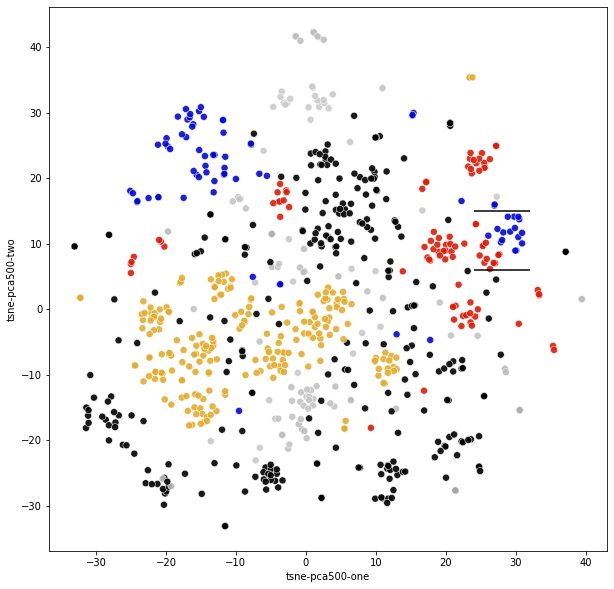

In [418]:
fig2, ax2  = plt.subplots(figsize =  (10,10))


source = df_TSNE
source["DBD"] = source["DBD"].fillna( "no domain")
source.dropna(how = "any", inplace= True)
# for ax, source in zip(axes, TSNEs):


subsource = source[(source["species"] == "PP") |
                   (source["class"]!="PP")
                  ]
sns.scatterplot(data =subsource, x ="tsne-pca500-one", y= "tsne-pca500-two",
                hue = "DBD",
                s = 50,
                style = "class",
                marker = "P",
                # hue_order= hue_order,
                legend = False,
                palette= palette(source),
                ax=ax2,
                alpha = 0.9
               )
TEXTS = []
for x,y,text in zip(subsource["tsne-pca500-one"], subsource["tsne-pca500-two"], subsource["id"]):
    # Only append selected countries
    text = text.split('-')[1]
    # if text in [ "PP_5241","PP_3551", "PP_1066", "PP_1401", "PP_0263" ]:
    #     TEXTS.append(ax2.annotate(text, xy=(x, y), xycoords='data',
    #                              fontsize=12,
    #                              xytext=(x+random.randrange(10)/100*pos_neg(), 
    #                                      y+random.randrange(10)/100*pos_neg()), 
    #                              textcoords='offset points',
    #                              arrowprops=dict(arrowstyle="-", color='grey', alpha=0.5)))


#settings for alphaproteoDB4
        # use lines to define the boundary of the cluster
# ax2.hlines(y = 34,
#           xmin =-20,
#           xmax=-6.5, color = "k")
# ax2.hlines(y = 50,
#           xmin = -20,
#           xmax=-6.5, color = "k")
# # define the boundary of the cluster
# subcluster  =source[
#     (source["tsne-pca500-one"]>=-20) &
#     (source["tsne-pca500-one"]<=-6.5) &
#     (source["tsne-pca500-two"]>=34) &
#     (source["tsne-pca500-two"]<=50) &
#     (source["class"].str.contains("Alp"))
#           ]

#settings for proteoDB2

# use lines to define the boundary of the cluster
ax2.hlines(y = 6,
          xmin =24,
          xmax=32, color = "k")
ax2.hlines(y = 15,
           xmin =24,
          xmax=32, color = "k")
# # define the boundary of the cluster
subcluster  =source[
    (source["tsne-pca500-one"]>=24) &
    (source["tsne-pca500-one"]<=32) &
    (source["tsne-pca500-two"]>=6) &
    (source["tsne-pca500-two"]<=15) 
    # (source["class"].str.contains("Alp"))
          ]
subcluster
# # fig2.savefig(os.path.join("Figures", "Alphaproteobacteria_subcluster.png"))

In [419]:
df_pairs = pd.merge(pd.DataFrame(pairs_in_data_set), df, left_on = 0, right_on = "stable_id")
df_pairs = df_pairs[df_pairs["TCStype"]!= "RR"].rename(columns={1:"cognate_RR"})

df_pairs

,0,cognate_RR,TCStype,aseq_id,domain_counts,domain_seq,env_from,env_to,gene_id,sequence,stable_id,version,gene_number
0,GCF_000739895.2-SP6_RS02170,GCF_000739895.2-SP6_RS02165,HK,xPXRE1gBOVPzkBCvYvYQ3A,"{'HAMP': 1, 'HK_CA': 1}",LRQVSSDIAHDLRTPLTRLRAEAERAAGEWDGSEIARARLHKVVAQ...,231,451,3695806,MASEGLVRWRHSATLRIALIHSAAILLATALLGALVVHAFHVTVQR...,GCF_000739895.2-SP6_RS02170,GCF_000739895.2,2170.0
3,GCF_000739895.2-SP6_RS02445,GCF_000739895.2-SP6_RS02450,HK,zp07fkDQeNPUdSxHPOZUbQ,"{'HAMP': 1, 'HK_CA': 1}",KIATDGLAHDLRSPLTRLRATLERALAECQDEATRIGVARALDEGD...,208,419,3695651,MVATVRHLTRSEIADQAEDAASDLRDELAGVWLAGGREAVRQAVVR...,GCF_000739895.2-SP6_RS02445,GCF_000739895.2,2445.0
6,GCF_000739895.2-SP6_RS05315,GCF_000739895.2-SP6_RS05310,HK,qM8yDCfMhWpkRrVlBa1RfA,"{'PAS': 1, 'HK_CA': 1}",AAAMLAHEIKNPLSGIRGAAQLLNGGELTTLITTEVDRIAALIDRM...,135,354,3694932,MPLRPEPARHGRPGFAALFAALPVAVVVVDPDDRIAHANGLAEQLL...,GCF_000739895.2-SP6_RS05315,GCF_000739895.2,5315.0
9,GCF_000739895.2-SP6_RS05305,GCF_000739895.2-SP6_RS05310,HK,4FIfXD2MQq2P3b9t3pd8FQ,"{'HAMP': 1, 'HK_CA': 1}",WSDVARRIAHEIKNPLTPIQLAAERLQRRYGKVIDPQDETFGRLTE...,499,721,3694930,MLAFLKPADPTDTPRNRFAVTPAIEIVVIVGAVAIAIGTYWFIAHR...,GCF_000739895.2-SP6_RS05305,GCF_000739895.2,5305.0
10,GCF_000739895.2-SP6_RS05305,GCF_000739895.2-SP6_RS05300,HK,4FIfXD2MQq2P3b9t3pd8FQ,"{'HAMP': 1, 'HK_CA': 1}",WSDVARRIAHEIKNPLTPIQLAAERLQRRYGKVIDPQDETFGRLTE...,499,721,3694930,MLAFLKPADPTDTPRNRFAVTPAIEIVVIVGAVAIAIGTYWFIAHR...,GCF_000739895.2-SP6_RS05305,GCF_000739895.2,5305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,GCF_000204015.1-ABI_RS05245,GCF_000204015.1-ABI_RS05250,HK,j0OxjJTceyMqtMeb41mhNg,{'HK_CA': 1},RQRLIRDMHDGIGGQLVSLMLQLKGKPLPQERVHQQVQAAVDDLRL...,430,621,7121769,MTAAAIWQHRFVRLALGILSAQILFWGTLFLIGETEKEHLYMKSWE...,GCF_000204015.1-ABI_RS05245,GCF_000204015.1,5245.0
559,GCF_000204015.1-ABI_RS03065,GCF_000204015.1-ABI_RS03070,HK,YQWehwg5h3U2mFr5SbJt_A,"{'HK_CA': 1, 'HisKA': 1}",LGGLAAAAAHELGTPLGTIQVVAKEMLHSLKKTDPLYEDAELLVSQ...,225,455,7121329,MMTALERLGAFFNGPDDAGRGLGPLSREKDPLRLRTLVMLRWLAIL...,GCF_000204015.1-ABI_RS03065,GCF_000204015.1,3065.0
561,GCF_000204015.1-ABI_RS04445,GCF_000204015.1-ABI_RS04450,HK,GBADhPKb_cQUHNtqenlRJg,"{'PAS': 1, 'HK_CA': 1, 'CHASE3': 1}",KSEFLSRTSHELRTPMSAILGFGQLLELDENTLAPHQRAAVEQIMM...,414,638,7121607,MKTAAPPSLTRYWADRPLALKGLVVVILPLGILLCALISLFLASHA...,GCF_000204015.1-ABI_RS04445,GCF_000204015.1,4445.0
562,GCF_000204015.1-ABI_RS04445,GCF_000204015.1-ABI_RS04440,HK,GBADhPKb_cQUHNtqenlRJg,"{'PAS': 1, 'HK_CA': 1, 'CHASE3': 1}",KSEFLSRTSHELRTPMSAILGFGQLLELDENTLAPHQRAAVEQIMM...,414,638,7121607,MKTAAPPSLTRYWADRPLALKGLVVVILPLGILLCALISLFLASHA...,GCF_000204015.1-ABI_RS04445,GCF_000204015.1,4445.0


In [392]:
df_cognate_HKs = pd.merge(df_pairs, subcluster, left_on = "cognate_RR", right_on = "id", suffixes = ("_HK", "_RR"))
df_cognate_HKs



,0,cognate_RR,TCStype,aseq_id,domain_counts,domain_seq,env_from,env_to,gene_id_HK,sequence,...,class,order,family,genus,species_x,DBD,id,species,tsne-pca500-one,tsne-pca500-two
0,GCF_000565345.1-D481_RS0113960,GCF_000565345.1-D481_RS0113965,HK,LJ_gIJ0v02cJDilNh8drRw,"{'PAS': 1, 'HK_CA': 1}",AKELVRGLAHEIKNPLGGLRGAAQLLEKMLPDASLAEYTQIIIEQA...,127,347,5867241,MTPAQLFDHLLTAIIVVDSQWRIEYVNAAAEQLMHQSARRLRQQPL...,...,Gammaproteobacteria,Vibrionales,Vibrionaceae,Salinivibrio,Salinivibrio costicola,HTH_8,GCF_000565345.1-D481_RS0113965,D481,9.322794,14.029424
1,GCF_000260135.1-THINI_RS21540,GCF_000260135.1-THINI_RS21545,Hybrid_HK,P21RW8Ml01fs-89yCqerag,"{'RR': 1, 'PAS': 2, 'HK_CA': 2}",MGELVASISHEINQPLSAVITNSDAALRWLSHASPNTEEVAAALKR...,740,963,1981116,MPDDDRGTVIPPVSVRGVVIHADDAQDVRRQKMARIILDSMYQFLG...,...,Gammaproteobacteria,Thiotrichales,Thiotrichaceae,Thiothrix,Thiothrix nivea,GerE,GCF_000260135.1-THINI_RS21545,THINI,12.205405,8.406179
2,GCF_000260135.1-THINI_RS16260,GCF_000260135.1-THINI_RS16265,HK,NFH5tf6_9Mu1MMYW0ePQVw,"{'PAS': 1, 'HK_CA': 1}",VHELVRGIAHEIKNPLGGLRGAAQLLESELENPELKEYTQIIISEA...,132,350,1980060,MKNVNMKRSELLEILTCSILVLDSDLHVVYMNQSAEMLLGQSQQRV...,...,Gammaproteobacteria,Thiotrichales,Thiotrichaceae,Thiothrix,Thiothrix nivea,HTH_8,GCF_000260135.1-THINI_RS16265,THINI,10.679175,14.888805
3,GCF_000260135.1-THINI_RS14600,GCF_000260135.1-THINI_RS14595,HK,Uj5SdadmmFWTN69WALuDZw,"{'HK_CA': 1, 'dCache_1': 1}",LGQLSAGINHEINNPLTAIRAYADNAAQFLDIGKPDIARSNLMEIV...,350,570,1979729,MLAGWVAILFSAITLLTVYYAVRQNAEQRLQQETAVLSQQLVSQLE...,...,Gammaproteobacteria,Thiotrichales,Thiotrichaceae,Thiothrix,Thiothrix nivea,HTH_8,GCF_000260135.1-THINI_RS14595,THINI,9.176337,10.147910
4,GCF_000711315.1-P166_RS0102600,GCF_000711315.1-P166_RS0102605,HK,HG7Z-MRrp6kb96SqMc-1iw,{'HK_CA': 1},LLVRTLAHEIKNPLAGIYGSTQLLRKRFPDNEKAEKFLDVISNEVN...,133,352,3969986,MNFNKIEQNVSESEILSGLTTAVVWIDKNENIGFINLAAAELLQLS...,...,Gammaproteobacteria,Thiotrichales,Piscirickettsiaceae,Hydrogenovibrio,Hydrogenovibrio marinus,HTH_8,GCF_000711315.1-P166_RS0102605,P166,13.027780,13.475702
5,GCF_000215955.2-SSPSH_RS02035,GCF_000215955.2-SSPSH_RS02040,HK,ahzym25i9xyTS6GRjnXtTg,"{'PAS': 1, 'HK_CA': 1}",NREMIRGLAHEIKNPLGGLRGAAQLLEREIDDDELKEFTTVIIREA...,136,355,9752374,MSSRDSIGVRPDTILDNLKTAVVCLDSRLRVTYLNTASEMLFGVSA...,...,Gammaproteobacteria,Salinisphaerales,Salinisphaeraceae,Salinisphaera,Salinisphaera shabanensis,HTH_8,GCF_000215955.2-SSPSH_RS02040,SSPSH,9.238875,14.934832
6,GCF_000215955.2-SSPSH_RS07895,GCF_000215955.2-SSPSH_RS07890,HK,wLhDHA83hVpZbqZMwlF6AA,"{'PAS': 1, 'HK_CA': 1}",LGTGLAHDLSQPLTAARNFIARARMGFQSSPDEIRQTLERADTEIS...,187,411,9751385,MTDRESEQLDYQQPATLEAARARIEQLERQLQAERERRREIEANER...,...,Gammaproteobacteria,Salinisphaerales,Salinisphaeraceae,Salinisphaera,Salinisphaera shabanensis,GerE,GCF_000215955.2-SSPSH_RS07890,SSPSH,9.752059,7.440448
7,GCF_000209675.1-UMN179_RS06455,GCF_000209675.1-UMN179_RS06460,HK,4dxVtL-QqkWS7GFLWv-XvA,{'HK_CA': 1},GKTMTTLAHEINQPLNVLSIYIFSLKKMVMQKSYNQFSSYIDKIES...,423,636,1637816,MKTMKRKKSIIKILKTVFLINIFLMILIGGASLFSWYRQNNQINYI...,...,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Gallibacterium,Gallibacterium anatis,HTH_8,GCF_000209675.1-UMN179_RS06460,UMN179,8.419876,10.196831
8,GCF_000209675.1-UMN179_RS06380,GCF_000209675.1-UMN179_RS06375,HK,d7WfTi2kOBSumN1ZZdd7YA,"{'HK_CA': 1, 'Phosphonate-bd': 1}",LGEMSAGIAHEINQPLTAIGMYSEGLKQQLKQRSDATFELQILDKI...,339,554,1637801,MLSLFPFFAGADNWKIGILAQRGETFLSQQWQPWINWLNQRDPQQH...,...,Gammaproteobacteria,Pasteurellales,Pasteurellaceae,Gallibacterium,Gallibacterium anatis,GerE,GCF_000209675.1-UMN179_RS06375,UMN179,10.928570,11.046830
9,GCF_000807275.1-FPB0191_RS11285,GCF_000807275.1-FPB0191_RS11290,HK,Iva2wMXqHgRMraXU-93TMg,{'HK_CA': 1},ARDLVRGLAHEIKNPLGGLRGAAQLLARELPNDDLQEYTQVIIEQA...,128,349,18957806,MTKHPFEADAILNSLFTHILLLNDQLHIIFANSSAQQLLGQSTKKL...,...,Gammaproteobacteria,Orbales,Orbaceae,Frischella,Frischella perrara,HTH_8,GCF_000807275.1-FPB0191_RS11290,FPB0191,11.229157,12.934503


In [393]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [422]:
records = []
HKs = []
for HK, dom_seq, RR_DBD in zip(df_cognate_HKs["stable_id"], df_cognate_HKs["domain_seq"],  df_cognate_HKs["DBD"] ):
    record = SeqRecord(Seq(dom_seq),
                   id=HK,
                   description=RR_DBD)
    HKs.append(record)

with open("cognateHK_files/Alphaproteobactiera_DB2_cognate_HKs.fasta", "w") as output_handle:
    SeqIO.write(HKs, output_handle, "fasta")
output_handle.close


<function TextIOWrapper.close()>

In [423]:
infile = f"cognateHK_files/Alphaproteobactiera_DB2_cognate_HKs.fasta"
alignfile = f"cognateHK_files/Alphaproteobactiera_DB2_cognate_HKs.afa"
!mafft-linsi {infile}>{alignfile}




outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.419
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   20 / 22
done.

Progressive alignment ... 
STEP    14 /21 
Reallocating..done. *alloclen = 1450
STEP    21 /21 
done.
tbfast (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

   20 / 22
Segment   1/  1    1- 259
STEP 003-015-1  identical.    rejected. rejected. accepted. accepted. identical.    identical.   
Converged.

done
dvtditr (aa) Version 7.419
alg=A, model=

In [424]:
HK_GerE, HK_AAA = [], []
for seqrecord in SeqIO.parse(alignfile, "fasta"):
    if "GerE" in seqrecord.description or "no" in seqrecord.description:
        HK_GerE.append(seqrecord)
    elif "AAA" in  seqrecord.description or "HTH_8" in seqrecord.description or "Sigma" in  seqrecord.description:
        HK_AAA.append(seqrecord)

HK_GerE

[SeqRecord(seq=Seq('MGELVASISHEINQPLSAVITNSDAALRWLSHASPNTEEVAAALKRVNRDANLA...DSS'), id='GCF_000260135.1-THINI_RS21540', name='GCF_000260135.1-THINI_RS21540', description='GCF_000260135.1-THINI_RS21540 GerE', dbxrefs=[]),
 SeqRecord(seq=Seq('---LGTGLAHDLSQPLTAARNFIARARMGF-QSSPDE--IRQTLERADTEISRA...-RH'), id='GCF_000215955.2-SSPSH_RS07895', name='GCF_000215955.2-SSPSH_RS07895', description='GCF_000215955.2-SSPSH_RS07895 GerE', dbxrefs=[]),
 SeqRecord(seq=Seq('LGEMSAGIAHEINQPLTAIGMYSEGLKQQLKQRSDATFE-LQILDKIQVQVDRS...LNQ'), id='GCF_000209675.1-UMN179_RS06380', name='GCF_000209675.1-UMN179_RS06380', description='GCF_000209675.1-UMN179_RS06380 GerE', dbxrefs=[]),
 SeqRecord(seq=Seq('MGEMASGIAHEVNQPLTAIATYSQVCLRMLKSDKLDLIKLQETLQKTETQALRA...ILE'), id='GCF_002072955.1-AU255_RS15945', name='GCF_002072955.1-AU255_RS15945', description='GCF_002072955.1-AU255_RS15945 GerE', dbxrefs=[])]

In [425]:
for domain, record in zip(["GerE", "AAA"], [HK_GerE, HK_AAA]):
    with open(f"cognateHK_files/Alphaproteobactiera_DB2_cognate_HKs{domain}.fasta", "w") as output_handle:
        SeqIO.write(record, output_handle, "fasta")
    output_handle.close

In [437]:
cat cognateHK_files/*.afa > cognateHK_files/all_afa.afa

In [438]:
!head cognateHK_files/all_afa.afa

>GCF_000284375.1-BJ6T_RS16865 GerE
RKEIARELHDEFGPYLFSLRAHASALAKLADGRA-----PNAESVRKHGSALLEQINQLQ
QFTRRV---LERLRPVG----LAELGLRQALESLSRLWRESH---PDVAIE-TVISATLG
V-TGETADLTIYRIVQEALTNVFRHAG-----------------ATSVNVVI--------
--EPVEQAGGRGYARVRVSDNGRGMEPG--------------------QKLGFGLVGMRE
RILALGGTLNVVSGDG---------GLTVEALVPTA-
>GCF_000284375.1-BJ6T_RS15740 GerE
-QRIASELHDSTCQELVAASLGVMRVRTCLDKPR---------DVERLCDDIDASID---
AALKEIRSLTYLLHP-QD---LTDRGLKATIEQHALGFGAR----TSLRVS-TRIPAAVD
K-LPYASQLSVLRVIQEALTNIFRHAK-----------------ATEVRIVV--------


In [439]:
seen = []
records = []
for seqrecord in SeqIO.parse("cognateHK_files/all_afa.afa", "fasta"):
    if str(seqrecord.seq) not in seen:
        seen.append(str(seqrecord.seq))
        records.append(seqrecord)
        
with open(f"cognateHK_files/all_afa_clean.afa", "w") as output_handle:
    SeqIO.write(records, output_handle, "fasta")
output_handle.close

<function TextIOWrapper.close()>

In [440]:
!mafft-linsi cognateHK_files/all_afa_clean.afa>cognateHK_files/all_alna_afa.afa


outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.419
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  160 / 164
done.

Progressive alignment ... 
STEP   163 /163 
done.
tbfast (aa) Version 7.419
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

  160 / 164
Segment   1/  1    1- 296
STEP 003-063-0  identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identic

In [441]:
HK_GerE, HK_AAA = [], []
seen = []
for seqrecord in SeqIO.parse("cognateHK_files/all_alna_afa.afa", "fasta"):
    if str(seqrecord.seq) not in seen:
        if "GerE" in seqrecord.description:# or "no" in seqrecord.description:
            HK_GerE.append(seqrecord)
        elif "AAA" in  seqrecord.description or "HTH_8" in seqrecord.description or "Sigma" in  seqrecord.description:
            HK_AAA.append(seqrecord)

for domain, record in zip(["GerE", "AAA"], [HK_GerE, HK_AAA]):
    with open(f"cognateHK_files/All_cognate_HKs{domain}.fasta", "w") as output_handle:
        SeqIO.write(record, output_handle, "fasta")
    output_handle.close